In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score
from scipy import stats
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('Titanic_train.csv')
test_df=pd.read_csv('Titanic_test.csv')

### Data Exploration

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

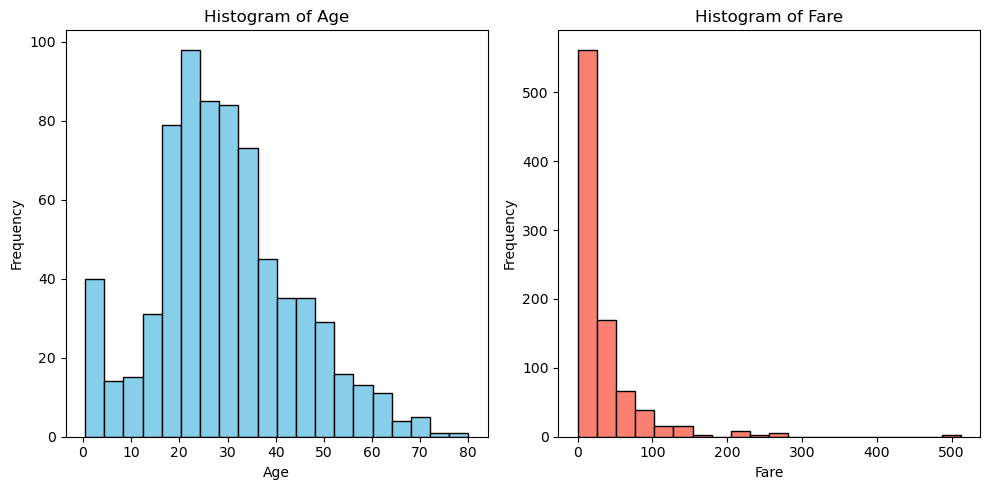

In [9]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(train_df['Age'],bins=20,color='skyblue',edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(train_df['Fare'],bins=20,color='salmon',edgecolor='black')
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
categorical_columns=['Pclass','Sex','SibSp','Parch','Embarked']

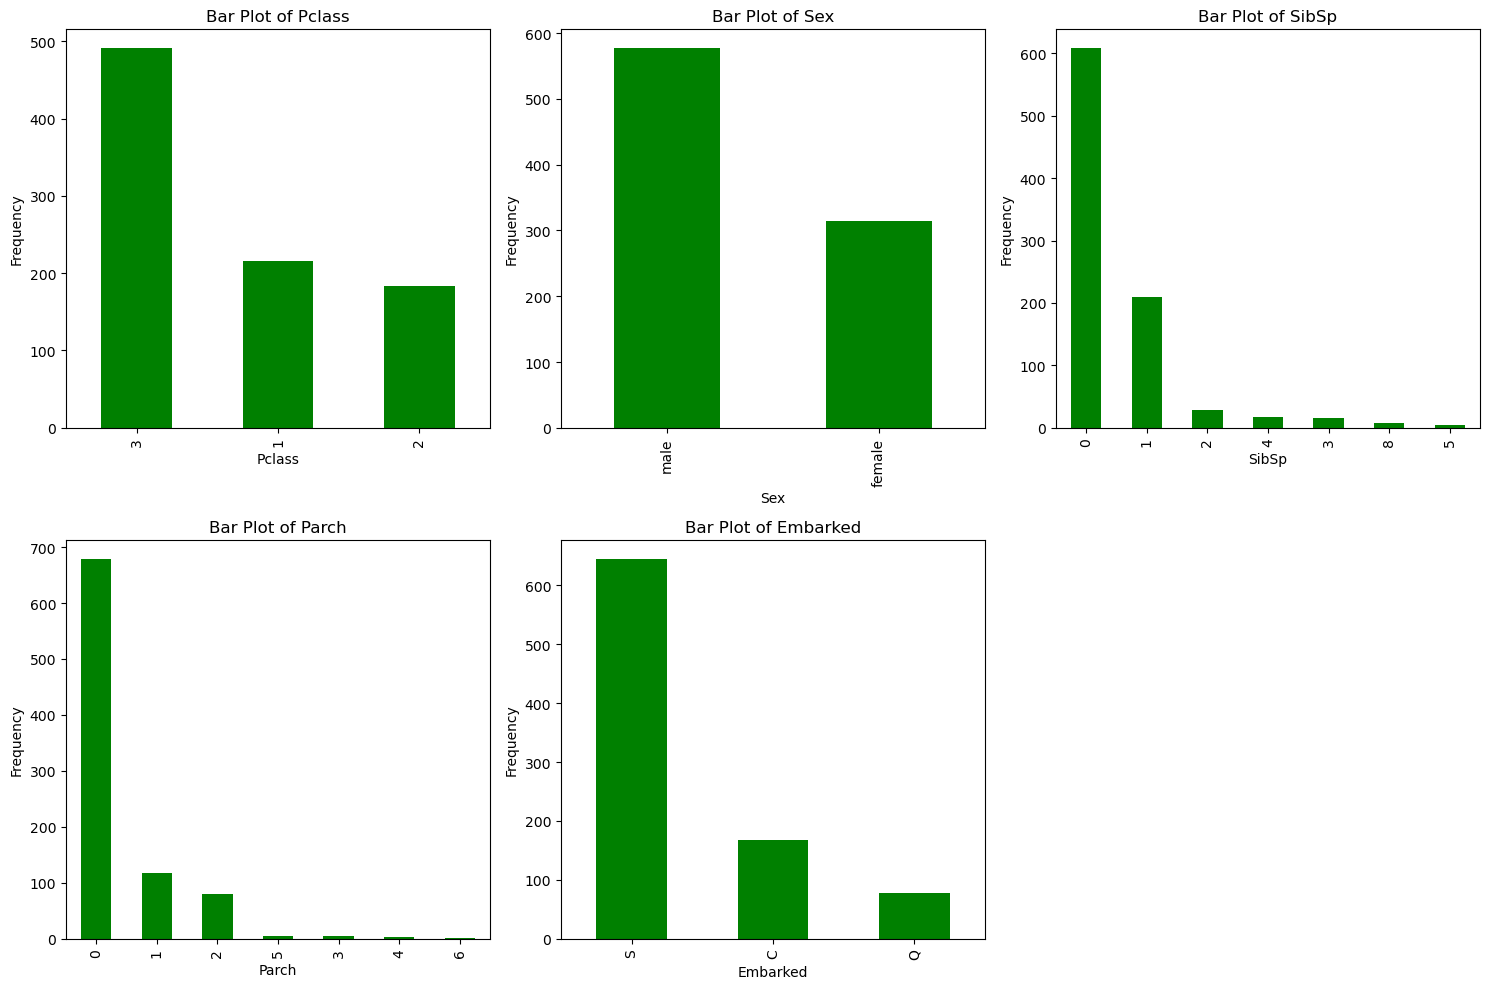

In [11]:
plt.figure(figsize=(15,10))

for i,column in enumerate(categorical_columns):
    plt.subplot(2,3,i+1)
    train_df[column].value_counts().plot(kind='bar',color='green')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Data Preprocessing

In [12]:
median_age=train_df['Age'].median()

In [13]:
train_df['Age'].fillna(median_age,inplace=True)
test_df['Age'].fillna(median_age,inplace=True)

In [14]:
most_frequent_embarked=train_df['Embarked'].mode()[0]

In [15]:
train_df['Embarked'].fillna(most_frequent_embarked,inplace=True)

In [16]:
train_df.drop('Cabin',axis=1,inplace=True)
test_df.drop('Cabin',axis=1,inplace=True)

In [17]:
train_df=pd.get_dummies(train_df,columns=['Sex','Embarked'],dtype='int')
test_df=pd.get_dummies(test_df,columns=['Sex','Embarked'],dtype='int')

In [18]:
train_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
test_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [19]:
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [20]:
test_df

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,28.0,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,28.0,0,0,8.0500,0,1,0,0,1


In [21]:
x_train=train_df.drop('Survived',axis=1)
y_train=train_df['Survived']

In [22]:
x_test=test_df

In [23]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


### Model Building

In [24]:
model=LogisticRegression()

In [25]:
model.fit(x_train,y_train)

LogisticRegression()

### Model Evaluation

In [26]:
median_fare=test_df['Fare'].median()
test_df['Fare'].fillna(median_fare,inplace=True)

In [27]:
y_pred_prob=model.predict_proba(x_test)[:,1]

In [28]:
cv=StratifiedKFold(n_splits=5)
tprs=[]
fprs=[]

In [29]:
for train_index,test_index in cv.split(x_train,y_train):
    x_train_fold,x_test_fold=x_train.iloc[train_index],x_train.iloc[test_index]
    y_train_fold,y_test_fold=y_train.iloc[train_index],y_train.iloc[test_index]

    model.fit(x_train_fold,y_train_fold)

    y_pred_prob_fold=model.predict_proba(x_test_fold)[:,1]

    fpr,tpr, _ =roc_curve(y_test_fold,y_pred_prob_fold)
    tprs.append(tpr)
    fprs.append(fpr)

In [30]:
base_fpr=np.linspace(0,1,101)
tprs_interp=[]
for i in range(len(fprs)):
    tpr_interp_func=interp1d(fprs[i],tprs[i],kind='linear')
    tprs_interp.append(tpr_interp_func(base_fpr))

In [31]:
mean_tpr=np.mean(tprs_interp,axis=0)
mean_tpr[0]=0.0
mean_tpr[-1]=1.0

In [32]:
roc_auc=roc_auc_score(y_train,model.predict_proba(x_train)[:,1])

In [33]:
roc_auc

0.854655993353146

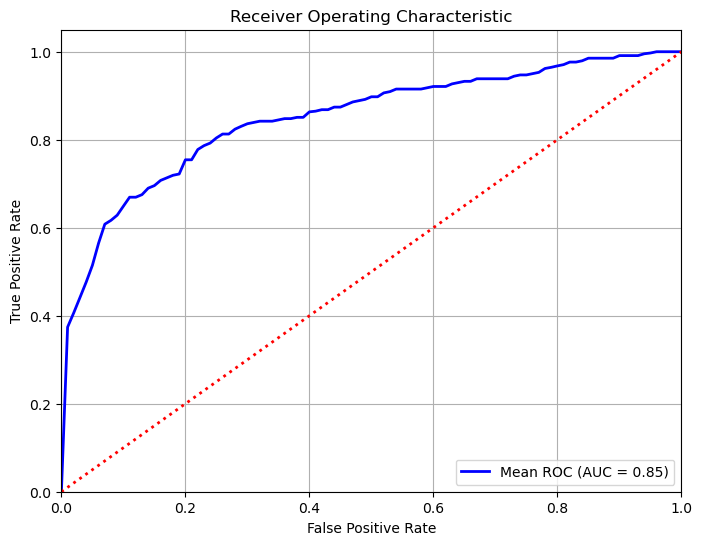

In [34]:
plt.figure(figsize=(8,6))
plt.plot(base_fpr,mean_tpr,color='blue',lw=2,label=f'Mean ROC (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color='red',lw=2,linestyle=':')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Interpretation

In [35]:
coefficients=model.coef_[0]

In [36]:
feature_names=x_train.columns

In [37]:
coef_df=pd.DataFrame({'Feature': feature_names,'Coefficient': coefficients})

In [38]:
coef_df

,Feature,Coefficient
0,Pclass,-1.000691
1,Age,-0.031667
2,SibSp,-0.256735
3,Parch,-0.153386
4,Fare,0.001417
5,Sex_female,2.107595
6,Sex_male,-0.536143
7,Embarked_C,0.597563
8,Embarked_Q,0.687177
9,Embarked_S,0.286712


In [39]:
cv_scores=cross_val_score(model,x_train,y_train,cv=5)
print(f'Mean Accuracy (5-fold cross-validation): {cv_scores.mean():.2f}')

Mean Accuracy (5-fold cross-validation): 0.79


In [40]:
import pickle

In [41]:
file='logmodel.pkl'

In [42]:
pickle.dump(model,open(file,'wb'))

Significance of Features in Predicting Survival Probability:

Pclass: The negative coefficient (-1.000691) indicates that as the passenger class increases, the survival probability decreases. This suggests that passengers in higher classes had a better chance of survival, likely due to factors like better access to lifeboats and preferential treatment during evacuation.

Age: The negative coefficient (-0.031667) implies that older passengers were less likely to survive. This could be attributed to factors such as physical limitations or social norms that prioritized saving women and children.

SibSp (Number of Siblings/Spouses Aboard): The negative coefficient (-0.256735) suggests that having more siblings or spouses on board decreased the chances of survival. This might be because larger groups faced difficulties staying together or securing enough lifeboat space.

Parch (Number of Parents/Children Aboard): The negative coefficient (-0.153386) for 'Parch' indicates that having more parents or children on board was associated with lower survival rates, possibly due to similar reasons as with 'SibSp'.

Fare: The positive coefficient (0.001417) indicates that passengers who paid higher fares had a slightly higher likelihood of survival. This aligns with the observation that higher-class passengers had better survival chances.

Sex: The large negative coefficient (-0.536143) highlights that being male significantly decreased the chances of survival. This reflects the "women and children first" protocol followed during the evacuation.

Embarked: These coefficients relate to the port of embarkation. Compared to Embarked_C, embarking from Q slightly increased survival chances, while embarking from S slightly decreased them. This could be due to differences in passenger demographics or evacuation procedures at different ports.

#### Interview Questions

1. What is the difference between precision and recall?

Precision: Precision is concerned with the accuracy of positive predictions. It answers for all the instances the model predicted as positive, how many were actually positive.

Formula: Precision = True Positives / (True Positives + False Positives)   

Interpretation: High precision means the model makes few false positive errors. It's valuable when the cost of a false positive is high.

Recall: Recall is concerned with the completeness of positive predictions. It answers for all the actual positive instances, how many did the model correctly identify as positive.

Formula: Recall = True Positives / (True Positives + False Negatives)

Interpretation: High recall means the model misses few actual positive instances. It's crucial when the cost of a false negative is high.

2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a technique used in machine learning to assess how well a model will generalize to new, unseen data. It involves partitioning the available data into multiple subsets (folds), training the model on some of the folds, and evaluating its performance on the remaining fold. This process is repeated multiple times, with each fold serving as the test set once. The final performance metric is then averaged across all the folds.

Importance in Binary Classification:

Limited Data: It helps to make efficient use of limited data by allowing you to train and evaluate the model on different subsets of the data, reducing the risk of overfitting (where the model performs well on the training data but poorly on new data).

Model Selection: It aids in comparing and selecting the best model among different algorithms or hyperparameter settings by providing a more reliable estimate of their performance on unseen data.

Performance Estimation: It gives a more realistic estimate of how the model is likely to perform on new, unseen data, as opposed to just evaluating it on a single held-out test set.

Robustness: It helps to identify potential issues with the model, such as high variance (where the model's performance varies significantly across different folds) or bias (where the model consistently underperforms or overperforms).